In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [3]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250519\pos0 10\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))

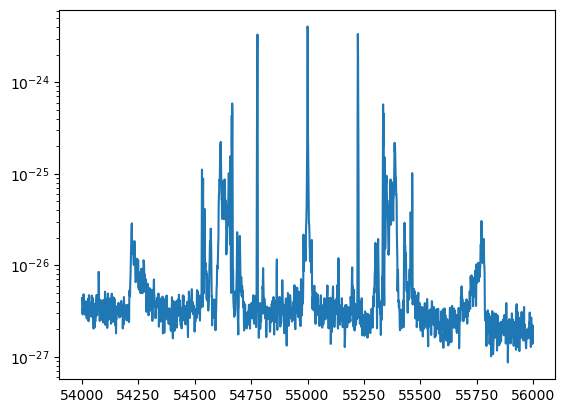

In [4]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
lb = 54000
ub = 56000
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub]*cal)
plt.yscale('log')

In [21]:
freqs = [5500]
numfiles = 100
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0, 1, 2]
cycles = [0, 1, 2, 3, 4]
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250507\20250519\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2

In [110]:
print(np.mean(amps_pos[:, :, 0, 0], axis = 2).flatten()*np.sqrt(cal))

[6.09144828e-12 1.64437104e-11 2.26829832e-11 1.86728749e-11
 2.37612335e-11 2.17802804e-11 2.43536398e-11 2.07418145e-11
 2.71717812e-11 2.42534655e-11]


In [61]:
print(np.mean(np.mean(amps_pos[:, :, 0, 0], axis = 2).flatten()[3:]))
print(np.mean(np.mean(amps_pos[:, :, 1, 0], axis = 2).flatten()[3:]))
print(np.mean(np.mean(amps_pos[:, :, 2, 0], axis = 2).flatten()[3:]))

0.0008384593753624967
0.0007911666940959735
0.000762631689321485


In [ ]:
print(np.mean(np.mean(phases_pos[:, :, 0, 0], axis = 2).flatten()[6:7]))
print(np.mean(np.mean(phases_pos[:, :, 1, 0], axis = 2).flatten()[6:7]))
print(np.mean(np.mean(phases_pos[:, :, 2, 0], axis = 2).flatten()[6:7]))

print(np.std(np.mean(phases_pos[:, :, 0, 0], axis = 2).flatten()[6:7]))
print(np.std(np.mean(phases_pos[:, :, 1, 0], axis = 2).flatten()[6:7]))
print(np.std(np.mean(phases_pos[:, :, 2, 0], axis = 2).flatten()[6:7]))

-5.488200073838327
-5.469903876444827
-5.475448673512219
0.0
0.0
0.0


In [140]:
print(np.mean(phases_pos[3,1,0,0]))
print(np.mean(phases_pos[3,1,1,0]))
print(np.mean(phases_pos[3,1,2,0]))

print(np.std(phases_pos[3,1,0,0]))
print(np.std(phases_pos[3,1,1,0]))
print(np.std(phases_pos[3,1,2,0]))

-5.31882376831668
-5.407709111972281
-5.430623649905922
0.5106331188376712
0.3523307639126542
0.27068610503528795


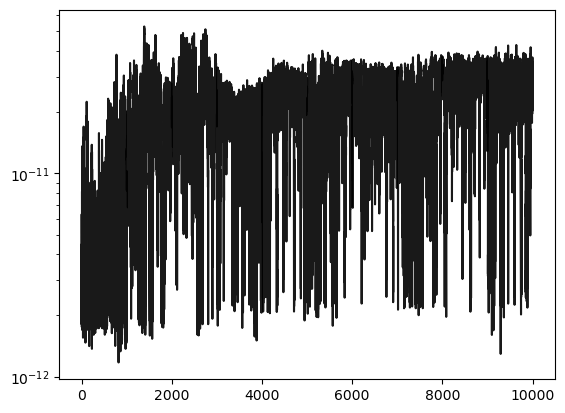

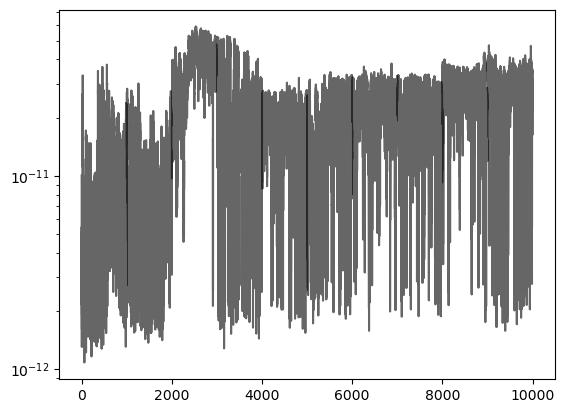

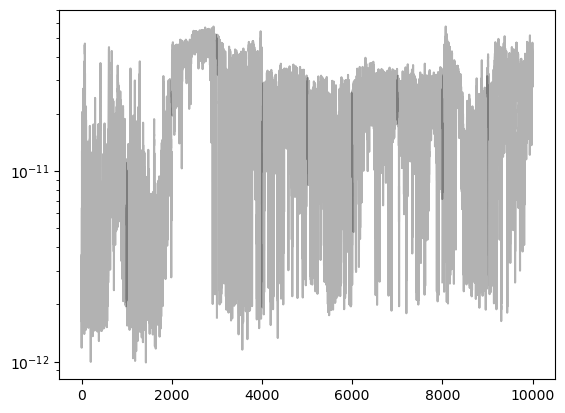

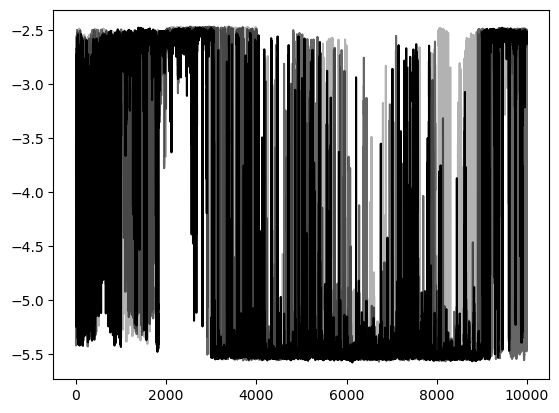

In [131]:
for m, i in enumerate(amps_pos[:,:, 0, 0].reshape((10, 10000))):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i*np.sqrt(cal), 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 1, 0].reshape((10, 10000))):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i*np.sqrt(cal), 'k', alpha = 0.6)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 2, 0].reshape((10, 10000))):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i*np.sqrt(cal), 'k', alpha = 0.3)

plt.yscale('log')
plt.figure()

for m, i in enumerate(phases_pos[:,:, 0, 0].reshape((10, 10000))):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i, 'k', alpha = 1)

for m, i in enumerate(phases_pos[:,:, 1, 0].reshape((10, 10000))):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i, 'k', alpha = 0.6)

for m, i in enumerate(phases_pos[:,:, 2, 0].reshape((10, 10000))):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i, 'k', alpha = 0.3)


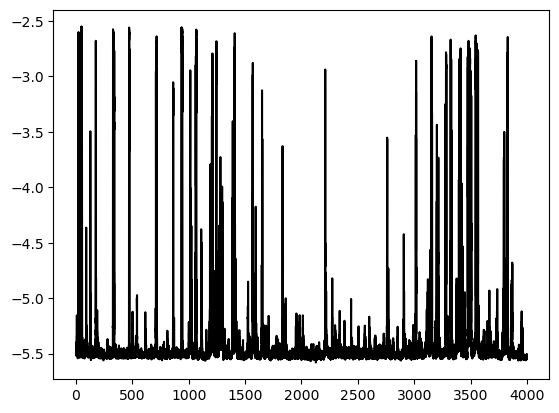

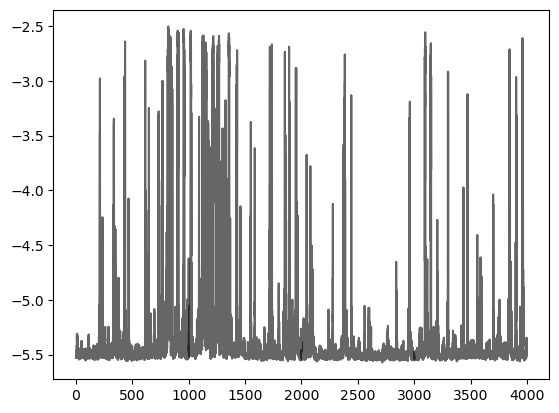

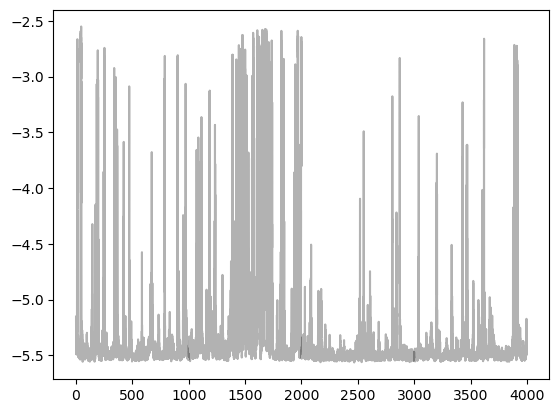

In [133]:
plt.figure()

for m, i in enumerate(phases_pos[:,:, 0, 0].reshape((10, 10000))[4:8]):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i, 'k', alpha = 1)
plt.figure()
for m, i in enumerate(phases_pos[:,:, 1, 0].reshape((10, 10000))[4:8]):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i, 'k', alpha = 0.6)
plt.figure()
for m, i in enumerate(phases_pos[:,:, 2, 0].reshape((10, 10000))[4:8]):
    plt.plot(np.linspace(0, 1000, 10000)+1000*m, i, 'k', alpha = 0.3)

In [35]:
amps_pos[:,:,0,0][0]

array([[1.04631954e-04, 8.16343205e-05, 1.00711715e-04, ...,
        2.19669369e-04, 2.38178281e-04, 2.52524058e-04],
       [4.27029721e-04, 4.24768979e-04, 4.47205836e-04, ...,
        6.84471648e-04, 7.28260649e-04, 7.69878974e-04]])

In [64]:
time = np.linspace(0, 1, 1000)

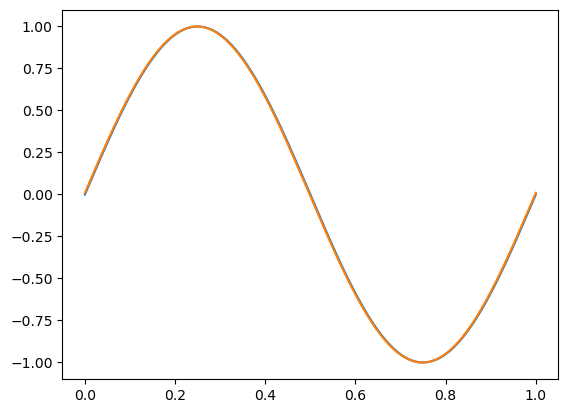

In [111]:
plt.plot(time, np.sin(2*np.pi*1*time))
plt.plot(time, np.sin(2*np.pi*1*time)+0.01*np.sin(2*np.pi*1*time+np.pi/2))

In [124]:
res = np.fft.rfft(np.sin(2*np.pi*10*time))
res2 = np.fft.rfft(np.sin(2*np.pi*10*time)+0.04*np.sin(2*np.pi*10*time+np.pi/2))

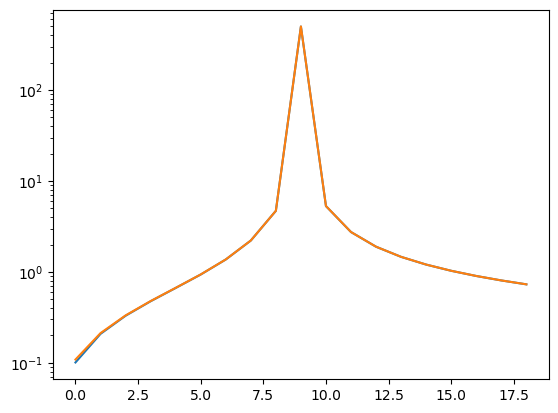

In [125]:
plt.plot(np.abs(res)[1:20])
plt.plot(np.abs(res2)[1:20])
plt.yscale('log')

In [126]:
print(np.abs(res[10]))
print(np.abs(res2[10]))
print(np.abs(res2[10])/np.abs(res[10]))

499.66734408594016
500.0677187512869
1.000801282433374


In [127]:
print(cmath.phase(res[10]))
print(cmath.phase(res2[10]))
print(cmath.phase(res2[10])-cmath.phase(res[10]))

-1.5393804002590001
-1.499361710766553
0.040018689492447246
